In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class SingleLayerNN(nn.Module):
    def __init__(self):
        super(SingleLayerNN, self).__init__()
        self.fc = nn.Linear(1, 1000) 
        self.fc2 = nn.Linear(1000, 250)
        self.out = nn.Linear(250, 1) 

    def forward(self, x):
        x = torch.relu(self.fc(x))  
        x = torch.relu(self.fc2(x))
        x = self.out(x)  
        return x

model = SingleLayerNN()

criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [2]:

X = torch.linspace(0, 4 * np.pi, 50).unsqueeze(-1) 
Y = torch.sin(X)  

l1_lambda = 0.0005

num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad() 
    outputs = model(X) 
    loss = criterion(outputs, Y)  

    l1_penalty = sum(p.abs().sum() for p in model.parameters())
    loss += l1_lambda * l1_penalty 

    loss.backward()  
    optimizer.step() 

    if epoch % 50 == 0:
        print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')


Epoch 0/10000, Loss: 3.675715446472168
Epoch 50/10000, Loss: 3.0860817432403564
Epoch 100/10000, Loss: 2.6283681392669678
Epoch 150/10000, Loss: 2.3564186096191406
Epoch 200/10000, Loss: 2.2593514919281006
Epoch 250/10000, Loss: 2.250823974609375
Epoch 300/10000, Loss: 1.9661281108856201
Epoch 350/10000, Loss: 2.305936336517334
Epoch 400/10000, Loss: 1.8910908699035645
Epoch 450/10000, Loss: 2.0402944087982178
Epoch 500/10000, Loss: 2.0087785720825195
Epoch 550/10000, Loss: 2.5678155422210693
Epoch 600/10000, Loss: 1.9926776885986328
Epoch 650/10000, Loss: 2.1255462169647217
Epoch 700/10000, Loss: 2.125838279724121
Epoch 750/10000, Loss: 2.123523473739624
Epoch 800/10000, Loss: 4.084609031677246
Epoch 850/10000, Loss: 2.6872470378875732
Epoch 900/10000, Loss: 2.62463116645813
Epoch 950/10000, Loss: 10.107245445251465
Epoch 1000/10000, Loss: 2.831451892852783
Epoch 1050/10000, Loss: 2.672391414642334
Epoch 1100/10000, Loss: 2.487605094909668
Epoch 1150/10000, Loss: 2.414961099624634
Epo

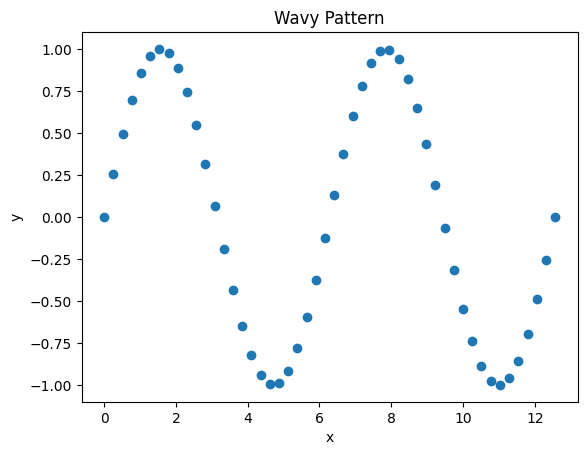

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.title('Wavy Pattern')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

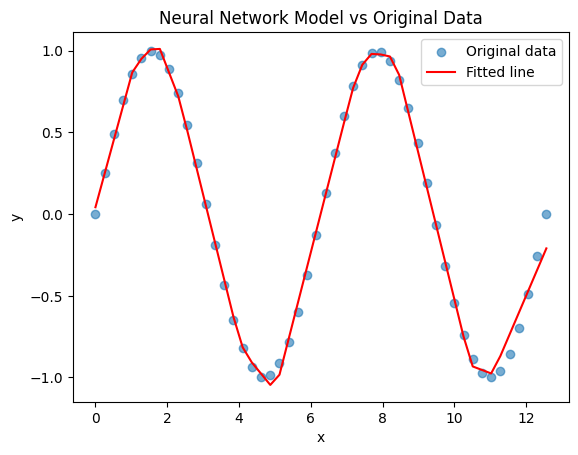

In [5]:
with torch.no_grad():  
    predicted = model(X).data.numpy() 

plt.scatter(X, Y, label='Original data', alpha=0.6)
plt.plot(X, predicted, label='Fitted line', color='red')
plt.legend()
plt.title('Neural Network Model vs Original Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

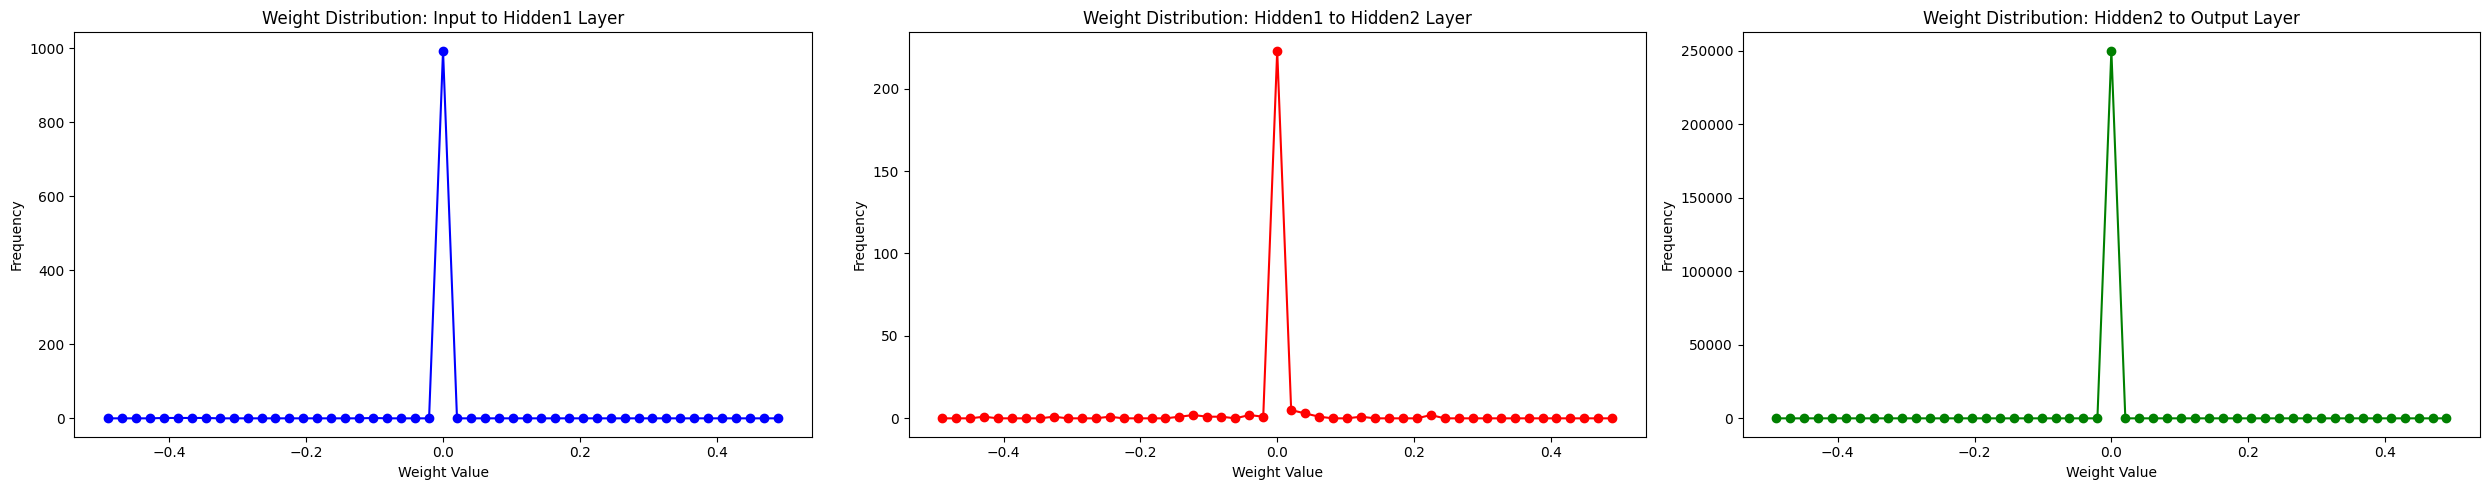

In [6]:
fc_weights = model.fc.weight.detach().numpy().flatten()
fc2_weights = model.fc2.weight.detach().numpy().flatten()
out_weights = model.out.weight.detach().numpy().flatten()

bins = np.linspace(-0.5, 0.5, 50)
fc_hist, fc_bins = np.histogram(fc_weights, bins=bins)
fc2_hist, fc2_bins = np.histogram(fc2_weights, bins=bins)
out_hist, out_bins = np.histogram(out_weights, bins=bins)

fc_bin_centers = 0.5 * (fc_bins[:-1] + fc_bins[1:])
fc2_bin_centers = 0.5 * (fc2_bins[:-1] + fc2_bins[1:])
out_bin_centers = 0.5 * (out_bins[:-1] + out_bins[1:])

plt.figure(figsize=(25, 5))
plt.subplot(1, 3, 1)
plt.plot(fc_bin_centers, fc_hist, marker='o', linestyle='-', color='b')
plt.title('Weight Distribution: Input to Hidden1 Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.plot(out_bin_centers, out_hist, marker='o', linestyle='-', color='r')
plt.title('Weight Distribution: Hidden1 to Hidden2 Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.plot(fc2_bin_centers, fc2_hist, marker='o', linestyle='-', color='g')
plt.title('Weight Distribution: Hidden2 to Output Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [7]:
import torch


def count_nonzero_weights_above_threshold(layer, threshold=0.1):
    return torch.sum(torch.abs(layer.weight) > threshold).item()

threshold_value = 0.01  

nonzero_fc1 = count_nonzero_weights_above_threshold(model.fc, threshold=threshold_value)
nonzero_fc2 = count_nonzero_weights_above_threshold(model.fc2, threshold=threshold_value)
nonzero_fc3 = count_nonzero_weights_above_threshold(model.out, threshold=threshold_value)

print(f'Number of non-zero weights greater than {threshold_value} in layer 1: {nonzero_fc1}')
print(f'Number of non-zero weights greater than {threshold_value} in layer 2: {nonzero_fc2}')
print(f'Number of non-zero weights greater than {threshold_value} in layer 3: {nonzero_fc3}')


Number of non-zero weights greater than 0.01 in layer 1: 7
Number of non-zero weights greater than 0.01 in layer 2: 35
Number of non-zero weights greater than 0.01 in layer 3: 27
